In [ ]:
# pip install matplotlib

In [1]:
import json

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
# from ResultsSavingAndModification import *

matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
matplotlib.rcParams['font.family'] = "serif"

In [2]:
# Variables

rangeOfRounds = range(1, 51)

modelsL2 = ["tiny_2_128", "model_2_256", "model_2_512", "model_2_768"]
modelsL4 = ["model_4_128", "mini_4_256", "small_4_512", "model_4_768"]
modelsL6 = ["model_6_128", "model_6_256", "model_6_512", "model_6_768"]
modelsL8 = ["model_8_128", "model_8_256", "medium_8_512", "model_8_768"]
modelsL10 = ["model_10_128", "model_10_256", "model_10_512", "model_10_768"]
modelsL12 = ["model_12_128", "model_12_256", "model_12_512", "base_12_768"]

modelsH128 = ["tiny_2_128", "model_4_128", "model_6_128", "model_8_128", "model_10_128", "model_12_128"]
modelsH256 = ["model_2_256", "mini_4_256", "model_6_256", "model_8_256", "model_10_256", "model_12_256"]
modelsH512 = ["model_2_512", "small_4_512", "model_6_512", "medium_8_512", "model_10_512", "model_12_512"]
modelsH768 = ["model_2_768", "model_4_768", "model_6_768", "model_8_768", "model_10_768", "base_12_768"]

colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "grey", "olive", "cyan", "magenta", "yellow", "black"]

## Functions

In [56]:
def getResultsFromFile(filename=""):
    file = open('log/' + filename + '.json')
    data = json.load(file)
    result = []
    for i in data['results']:
        result.append(i['macro avg']['f1-score'])
    file.close()
    return result

def getAll3Results(model="", dataset=""):
    res = []
    for i in range(1, 4):
        arr = getResultsFromFile('results-' + model + '-pretrained-' + dataset + '-' + str(i))
        res.append(arr)
    return res

def getAverageResult(model="", dataset=""):
    return np.mean(np.array(getAll3Results(model, dataset)), axis=0)

def calc_deviation(window):
    return sum((abs(w - np.mean(window))*100)**2 for w in window) / len(window)

def rmsed(res_ts, n=5, threshold=1):
    for j in range(51-n):
        # print(j, end=': ')
        window = res_ts[j:j+n]
        # print(window, end=' ')
        deviation = calc_deviation(window)
        if deviation < threshold:
            return j
    return j
    

In [57]:
models = {"L=2": modelsL2, "L=4": modelsL4, "L=6": modelsL6, "L=8": modelsL8, "L=10": modelsL10, "L=12": modelsL12}
for dataset in ["conll","few_nerd"]:
    print(dataset)
    for m_name, m_models in models.items():
        print("& " + m_name, end=" & ")
        for m_model in m_models:
            res_ts = getAverageResult(m_model, dataset)
            stable_ind = rmsed(res_ts)
            stable_deviation = round(calc_deviation(res_ts[stable_ind:]), 2)
            print(stable_ind, "({})".format(stable_deviation), end=" \\\\" if m_model == m_models[-1] else " & ")
        print("\n")
    print()


conll
& L=2 & 12 (0.57) & 6 (1.34) & 4 (0.85) & 5 (1.35) \\

& L=4 & 10 (1.19) & 5 (0.8) & 4 (0.37) & 3 (0.56) \\

& L=6 & 8 (1.28) & 5 (0.58) & 3 (0.71) & 3 (0.67) \\

& L=8 & 9 (0.82) & 5 (0.72) & 4 (0.51) & 4 (0.64) \\

& L=10 & 8 (1.36) & 4 (0.65) & 3 (0.38) & 4 (0.31) \\

& L=12 & 8 (1.27) & 4 (0.83) & 4 (0.36) & 4 (0.27) \\


few_nerd
& L=2 & 3 (0.47) & 2 (0.29) & 2 (0.2) & 3 (0.37) \\

& L=4 & 4 (0.29) & 2 (0.35) & 2 (0.09) & 2 (0.17) \\

& L=6 & 2 (0.55) & 2 (0.18) & 2 (0.14) & 2 (0.3) \\

& L=8 & 2 (0.43) & 2 (0.26) & 2 (0.21) & 3 (0.4) \\

& L=10 & 3 (0.7) & 2 (0.26) & 2 (0.19) & 3 (0.25) \\

& L=12 & 3 (0.29) & 2 (0.34) & 2 (0.22) & 3 (0.25) \\




In [10]:
def makePlotFig(models = []):
    i = 0
    for model in models:
        for dataset in ["conll","few_nerd"]:
            i += 1
            plt.plot(rangeOfRounds, getAverageResult(model, dataset), colors[i], label = model + ' - ' + dataset)
    
    plt.xlabel('Rounds 10x')
    plt.ylabel('Average macro f1-score')
    plt.legend()
    fig = plt.gcf()
    plt.show()
    plt.draw()
    return fig

In [11]:
def saveFigure300DpiTransparent(figure, fileName = "ChangeNameOfThisFile"):
    figure.savefig(fileName + '.png', dpi=300, transparent=True)

## Main work

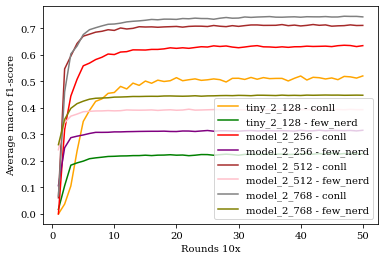

<Figure size 432x288 with 0 Axes>

In [12]:
figL2 = makePlotFig(modelsL2)
saveFigure300DpiTransparent(figL2, "Models L=2 diagram")

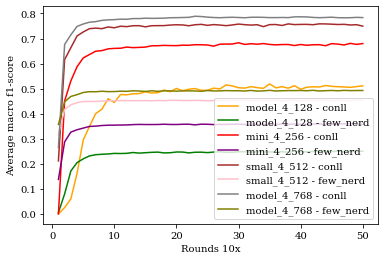

<Figure size 432x288 with 0 Axes>

In [14]:
figL4 = makePlotFig(modelsL4)
saveFigure300DpiTransparent(figL4, "Models L=4 diagram")

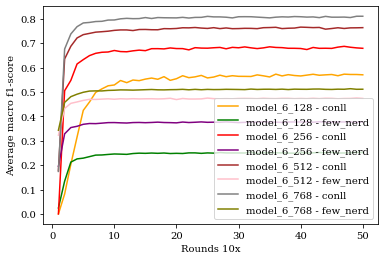

<Figure size 432x288 with 0 Axes>

In [15]:
figL6 = makePlotFig(modelsL6)
saveFigure300DpiTransparent(figL6, "Models L=6 diagram")

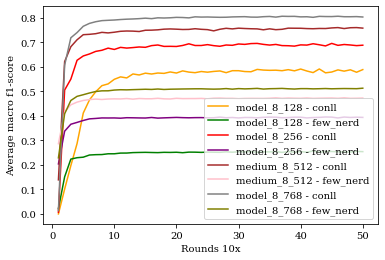

<Figure size 432x288 with 0 Axes>

In [16]:
figL8 = makePlotFig(modelsL8)
saveFigure300DpiTransparent(figL8, "Models L=8 diagram")

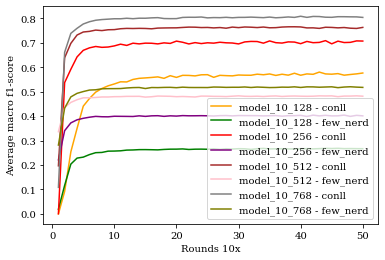

<Figure size 432x288 with 0 Axes>

In [17]:
figL10 = makePlotFig(modelsL10)
saveFigure300DpiTransparent(figL10, "Models L=10 diagram")

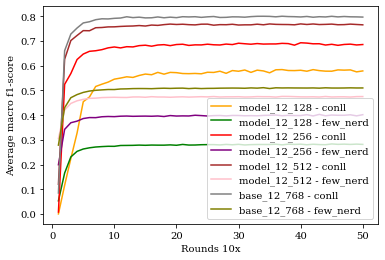

<Figure size 432x288 with 0 Axes>

In [18]:
figL12 = makePlotFig(modelsL12)
saveFigure300DpiTransparent(figL12, "Models L=12 diagram")

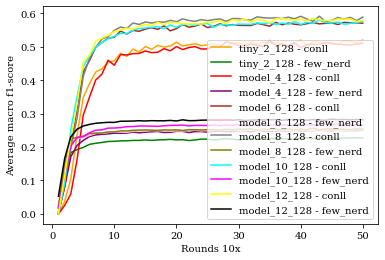

<Figure size 432x288 with 0 Axes>

In [26]:
figH128 = makePlotFig(modelsH128)
saveFigure300DpiTransparent(figH128, "Models H=128 diagram")

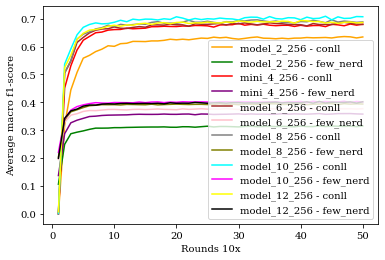

<Figure size 432x288 with 0 Axes>

In [27]:
figH256 = makePlotFig(modelsH256)
saveFigure300DpiTransparent(figH256, "Models H=256 diagram")

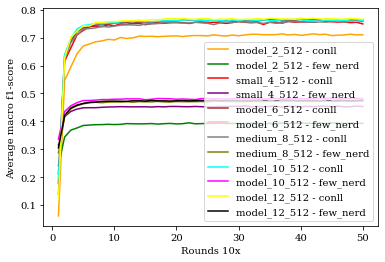

<Figure size 432x288 with 0 Axes>

In [28]:
figH512 = makePlotFig(modelsH512)
saveFigure300DpiTransparent(figH512, "Models H=512 diagram")

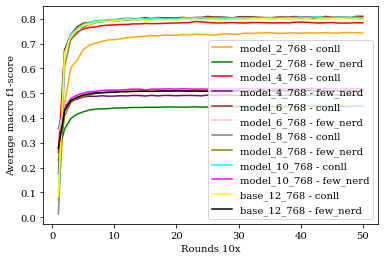

<Figure size 432x288 with 0 Axes>

In [29]:
figH768 = makePlotFig(modelsH768)
saveFigure300DpiTransparent(figH768, "Models H=768 diagram")